In [22]:
from spacerocks import SpaceRock, Propagate, Observe, Units
from astropy import units as u

import matplotlib.pyplot as plt
%matplotlib inline

units = Units()
units.angle = u.deg

In [49]:
from numpy import sqrt, cos, tan, linspace, array
import numpy as np

In [24]:
from skyfield.api import Topos, Loader


load = Loader('./Skyfield-Data', expire=False, verbose=False)
ts = load.timescale()
planets = load('de423.bsp')

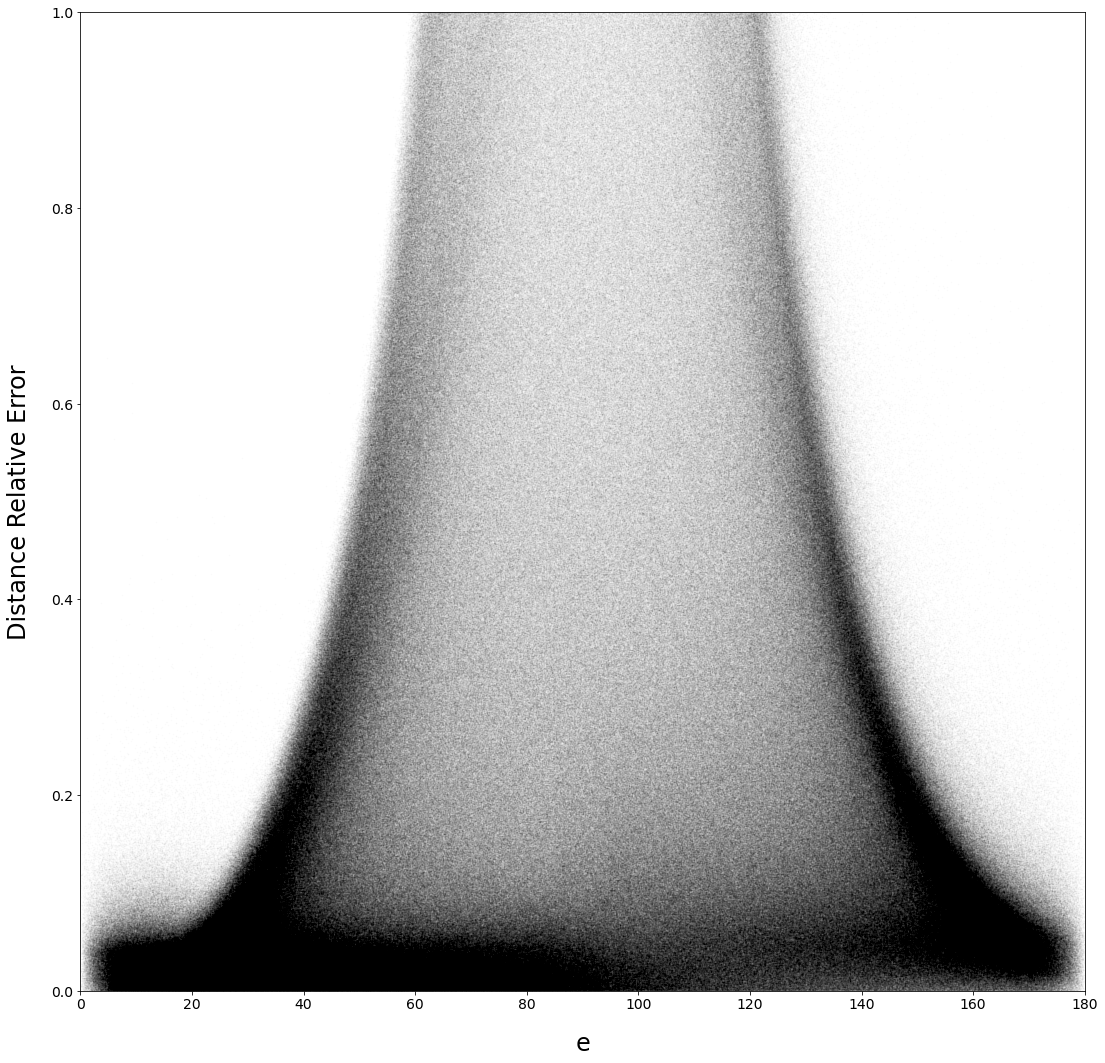

In [66]:
fig, ax = plt.subplots(figsize=(18, 18))

true = []
estimated = []
elong = []

N = 10000000
rock = SpaceRock(a=np.random.uniform(30, 500, N), 
                 e=np.random.rand(N), 
                 inc=np.random.uniform(0, 90, N), 
                 node=np.random.uniform(0, 360, N), 
                 arg=np.random.uniform(0, 360, N), 
                 M=np.random.uniform(0, 360, N), 
                 epoch=np.repeat(2459305.5, N), 
                 frame='barycentric', units=units)


t0 = ts.tdb(jd=rock.epoch.tdb.jd)
t1 = ts.tdb(jd=rock.epoch.tdb.jd + 4/24)
earth = planets['earth']

# Only used for the topocentric calculation.
#if self.__class__.obscode != 500:
#    earth += Topos(latitude_degrees=self.__class__.obslat,
#                   longitude_degrees=self.__class__.obslon,
#                   elevation_m=self.__class__.obselev) # topocentric calculation

e0 = earth.at(t0)
e1 = earth.at(t1)
x0, y0, z0 = e0.ecliptic_xyz().au
x1, y1, z1 = e1.ecliptic_xyz().au

d_earth = sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)

obs = Observe(rock)

rate = sqrt(obs.ra_rate.to(u.arcsec/u.hour)**2 * cos(obs.dec)**2 + obs.dec_rate.to(u.arcsec/u.hour)**2)

estimated.append(d_earth / tan(rate * 4 *u.h))
true.append(sqrt(obs.xT.au**2 + obs.yT.au**2 + obs.zT.au**2))
    
true = array(true)
estimated = array(estimated)

error = abs(true - estimated) / true
    


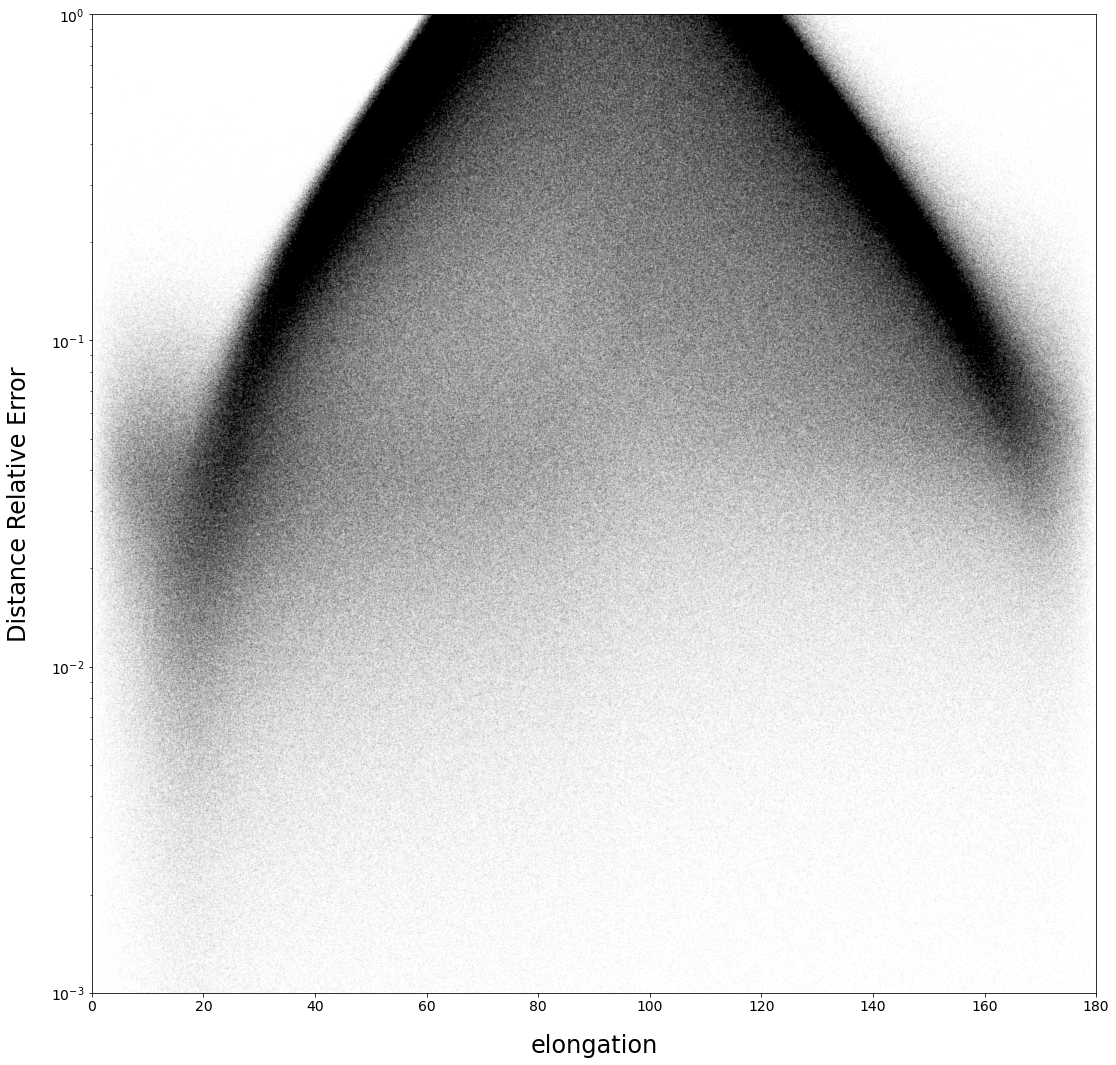

In [78]:
fig, ax = plt.subplots(figsize=(18, 18))

sc = ax.scatter(obs.elong.deg, error, alpha=0.01, s=1, color='black')
    

ax.tick_params(labelsize=14)
ax.set_xlabel('elongation', fontsize=24, labelpad=20)
ax.set_ylabel('Distance Relative Error', fontsize=24, labelpad=20)
ax.set_xlim([0, 180]);
ax.set_ylim([0.001, 1])
ax.set_yscale('log');